df = 4×2 DataFrame
│ Row │ A     │ B      │
│     │ Int64 │ String │
├─────┼───────┼────────┤
│ 1   │ 1     │ M      │
│ 2   │ 2     │ F      │
│ 3   │ 3     │ F      │
│ 4   │ 4     │ M      │


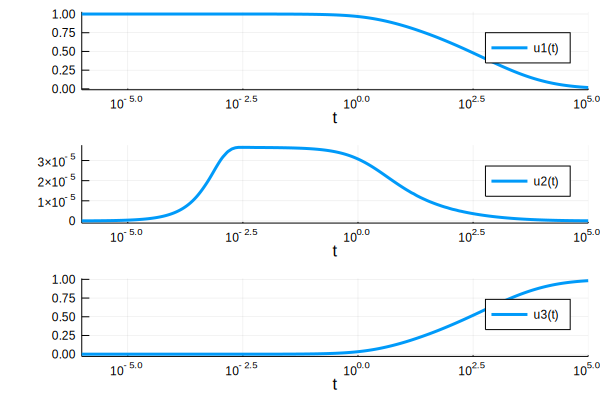

In [6]:
#Example http://docs.juliadiffeq.org/latest/tutorials/dae_example.html
df = DataFrame(A = 1:4, B = ["M", "F", "F", "M"])
@show df
using DifferentialEquations,Sundials, Plots, DataFrames
function f(out,du,u,p,t)
  out[1] = - 0.04u[1]              + 1e4*u[2]*u[3] - du[1]
  out[2] = + 0.04u[1] - 3e7*u[2]^2 - 1e4*u[2]*u[3] - du[2]
  out[3] = u[1] + u[2] + u[3] - 1.0
end
u₀ = [1.0, 0, 0]
du₀ = [-0.04, 0.04, 0.0]
tspan = (0.0,100000.0)
using DifferentialEquations
differential_vars = [true,true,false]
prob = DAEProblem(f,du₀,u₀,tspan,differential_vars=differential_vars)

sol = solve(prob,IDA())
using Plots;
plot(sol, xscale=:log10, tspan=(1e-6, 1e5), layout=(3,1))